In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.algorithms import duplicated
from pygments.util import duplicates_removed

In [40]:
#Load the dataset

df = pd.read_csv("C:\\Users\\USER\\Documents\\vehicle-price-prediction\\dataset\\raw\\car_price_dataset.csv")

print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Shape of dataset: (9788, 17)
   Unnamed: 0 Brand Model   YOM  Engine (cc)       Gear Fuel Type  \
0           0  AUDI    A1  2016        990.0  Automatic    Petrol   
1           1  AUDI    A1  2017       1000.0  Automatic    Petrol   
2           2  AUDI    A1  2018       1000.0  Automatic    Petrol   
3           3  AUDI    A1  2017       1000.0  Automatic    Petrol   
4           4  AUDI    A1  2017       1000.0  Automatic    Petrol   

   Millage(KM)                    Town        Date     Leasing Condition  \
0      99000.0                 Gampaha  2025-02-05  No Leasing      USED   
1      88000.0                 Colombo  2025-01-14  No Leasing      USED   
2      77000.0  Dehiwala-Mount-Lavinia  2025-01-23  No Leasing      USED   
3      88000.0                 Negombo  2024-12-21  No Leasing      USED   
4      88000.0                 Colombo  2024-12-21  No Leasing      USED   

  AIR CONDITION POWER STEERING POWER MIRROR POWER WINDOW  Price  
0     Available      Available   

In [41]:
#Handle missing values

print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Unnamed: 0        0
Brand             0
Model             0
YOM               0
Engine (cc)       0
Gear              0
Fuel Type         0
Millage(KM)       0
Town              0
Date              0
Leasing           0
Condition         0
AIR CONDITION     0
POWER STEERING    0
POWER MIRROR      0
POWER WINDOW      0
Price             0
dtype: int64


In [42]:
#Remove duplicates

before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows")


Removed 0 duplicate rows


In [43]:
#Handle outliers

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] >= Q1 - 1.5 * IQR) & (df['Price'] <= Q3 + 1.5 * IQR)]
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (9405, 17)


In [ ]:
# Exploratory Data Analysis(EDA)

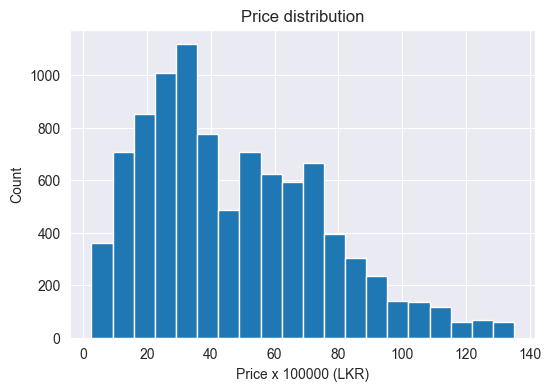

In [44]:
#Histogram of Price

plt.figure(figsize=(6, 4))
df['Price'].hist(bins=20)
plt.title('Price distribution')
plt.xlabel('Price x 100000 (LKR)')
plt.ylabel('Count')
plt.show()

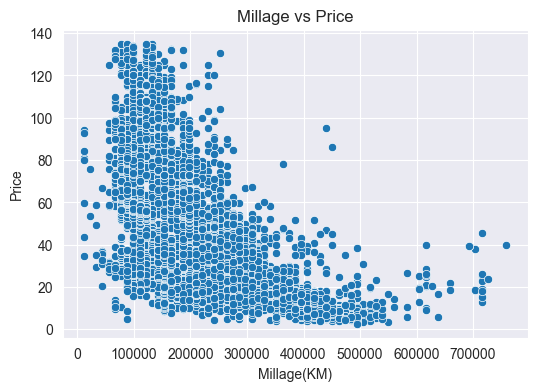

In [45]:
#Scatter: Price vs Mileage

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Millage(KM)', y='Price', data=df)
plt.title('Millage vs Price')
plt.show()

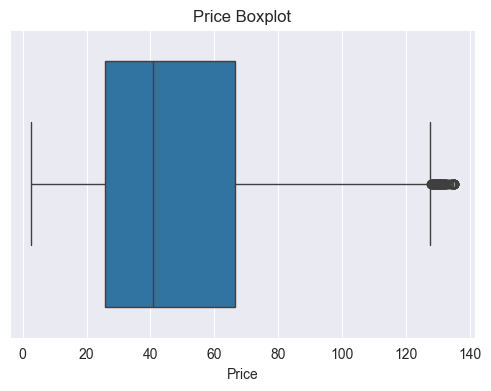

In [46]:
#Boxplot for price

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')
plt.show()

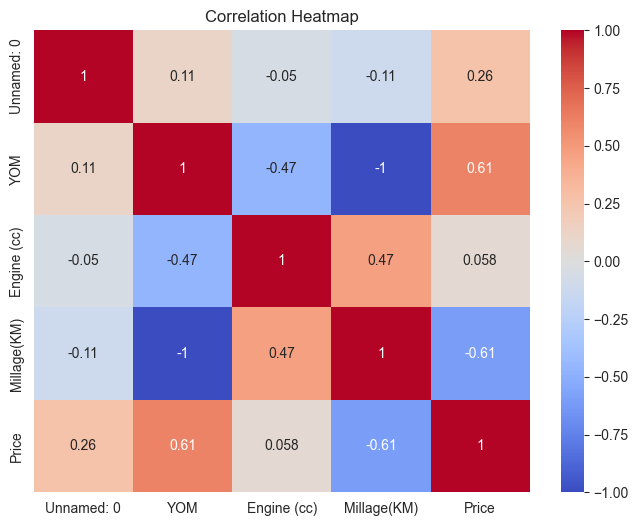

In [47]:
#Correlation heatmap (numerical)

plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['int64' , 'float64']).corr() , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Baseline ML Model (Linear Regression)

In [48]:
# Features: use only numerical columns for baseline
X = df[['YOM', 'Engine (cc)', 'Millage(KM)']]
y = df['Price']

# Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train baseline model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("\nBaseline Model Performance:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Baseline Model Performance:
R²: 0.5216675173147655
MAE: 15.140903135915352
RMSE: 19.261370093769273


In [51]:
import os

# Create processed folder
os.makedirs("C:\\Users\\USER\\Documents\\vehicle-price-prediction\\dataset\\processed", exist_ok=True)

# Save cleaned dataset
df.to_csv("C:\\Users\\USER\\Documents\\vehicle-price-prediction\\dataset\\processed\\cleaned_car_price_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_car_price_dataset.csv'")



Cleaned dataset saved as 'cleaned_car_price_dataset.csv'
